In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

WC_csv ="WorldCupMatches_HG.csv"

WC_df = pd.read_csv(WC_csv)

WC_df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Results,Winning Team,Win conditions,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,H,France,,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,H,USA,,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,H,Yugoslavia,,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,H,Romania,,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,H,Argentina,,1085.0,ARG,FRA


In [2]:
unique_countries_home=WC_df['Home Team Name']
unique_countries_home

0           France
1              USA
2       Yugoslavia
3          Romania
4        Argentina
          ...     
832         Brazil
833    Netherlands
834         Brazil
835        Germany
836            NaN
Name: Home Team Name, Length: 837, dtype: object

In [3]:
unique_countries_away=WC_df['Away Team Name']
unique_countries_away

0           Mexico
1          Belgium
2           Brazil
3             Peru
4           France
          ...     
832        Germany
833      Argentina
834    Netherlands
835      Argentina
836            NaN
Name: Away Team Name, Length: 837, dtype: object

In [4]:
home_team_points=pd.DataFrame({'Countries':WC_df['Home Team Name'],
                         'Number of Wins':[1 if i=='H' else 0 if i=='D' else 0 for i in WC_df['Results']],
                         'Number of Losses':[1 if i=='A' else 0 if i=='D' else 0 for i in WC_df['Results']],
                         'Number of Draws':[0 if i=='H' else 1 if i=='D' else 0 for i in WC_df['Results']],      
                         'Points':[2 if i=='H' else 1 if i=='D' else 0 for i in WC_df['Results']]})



away_team_points=pd.DataFrame({'Countries':WC_df['Away Team Name'],
                         'Number of Wins':[1 if i=='A' else 0 if i=='D' else 0 for i in WC_df['Results']],
                         'Number of Losses':[1 if i=='H' else 0 if i=='D' else 0 for i in WC_df['Results']],
                         'Number of Draws':[0 if i=='H' else 1 if i=='D' else 0 for i in WC_df['Results']],
                         'Points':[2 if i=='A' else 1 if i=='D' else 0 for i in WC_df['Results']]})

team_points=home_team_points.append(away_team_points).groupby('Countries').sum()

team_points

,Number of Wins,Number of Losses,Number of Draws,Points
Countries,,,,
Algeria,3,7,3,9
Angola,0,1,2,2
Argentina,46,22,9,101
Australia,2,8,3,7
Austria,12,13,4,28
...,...,...,...,...
United Arab Emirates,0,3,0,0
Uruguay,21,19,11,53
Wales,1,1,3,5


In [5]:
games_played=team_points['Number of Wins']+team_points['Number of Losses']+team_points['Number of Draws']
team_points['Number of Games Played'] = games_played
team_points=team_points[['Number of Games Played','Number of Wins','Number of Losses','Number of Draws','Points']]
team_points

,Number of Games Played,Number of Wins,Number of Losses,Number of Draws,Points
Countries,,,,,
Algeria,13,3,7,3,9
Angola,3,0,1,2,2
Argentina,77,46,22,9,101
Australia,13,2,8,3,7
Austria,29,12,13,4,28
...,...,...,...,...,...
United Arab Emirates,3,0,3,0,0
Uruguay,51,21,19,11,53
Wales,5,1,1,3,5


In [6]:
team_points.sort_values(by=['Points'], ascending=False).head(30)

,Number of Games Played,Number of Wins,Number of Losses,Number of Draws,Points
Countries,,,,,
Germany,112,72,22,18,162
Brazil,104,73,18,13,159
Italy,83,46,20,17,109
Argentina,77,46,22,9,101
England,62,26,19,17,69
Spain,59,30,20,9,69
France,59,30,21,8,68
Netherlands,50,28,13,9,65
Uruguay,51,21,19,11,53


Text(0, 0.5, 'Number Points')

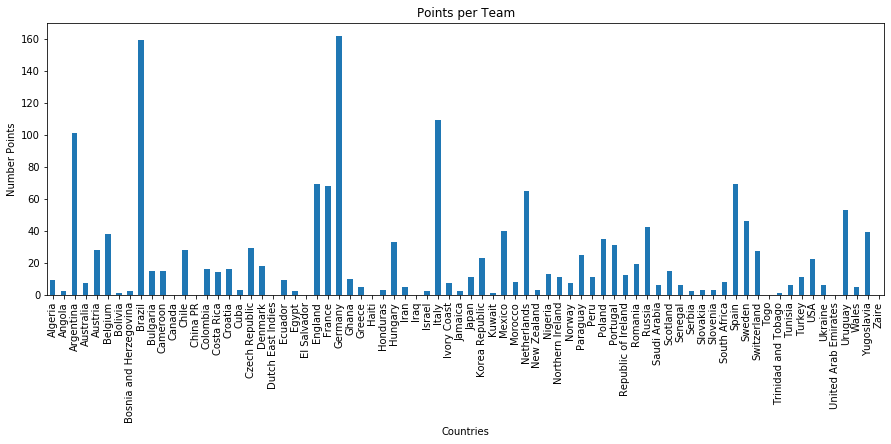

In [7]:
team_points.plot(kind="bar", figsize=(15,5), legend=False, y='Points')

#labels
plt.title("Points per Team")
plt.ylabel("Number Points")

In [8]:
best_team_points=team_points.nlargest(10, ['Points'])
best_team_points

,Number of Games Played,Number of Wins,Number of Losses,Number of Draws,Points
Countries,,,,,
Germany,112,72,22,18,162
Brazil,104,73,18,13,159
Italy,83,46,20,17,109
Argentina,77,46,22,9,101
England,62,26,19,17,69
Spain,59,30,20,9,69
France,59,30,21,8,68
Netherlands,50,28,13,9,65
Uruguay,51,21,19,11,53


Text(0, 0.5, 'Number Points')

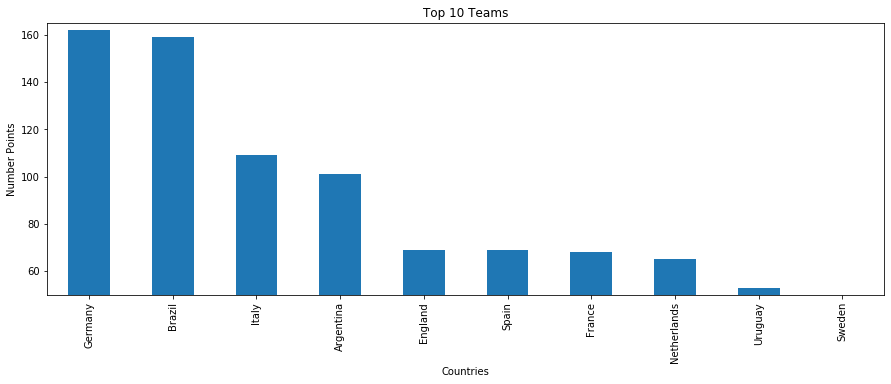

In [9]:
best_team_points.plot(kind="bar", figsize=(15,5), legend=False, y='Points')

plt.ylim(50, 165)
#labels
plt.title("Top 10 Teams")
plt.ylabel("Number Points")

In [10]:
team_points.to_csv("Team_Points.csv",
                  encoding="utf-8", index=True, header=True)